<a href="https://colab.research.google.com/github/SolisProcopioUriel/Modelaci-n-financiera/blob/main/U2_EA_Computaci%C3%B3n_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

# Cargar el archivo Excel
from google.colab import files
uploaded = files.upload()

Saving MCOM2_U2_EA_URSP.xlsx to MCOM2_U2_EA_URSP.xlsx


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


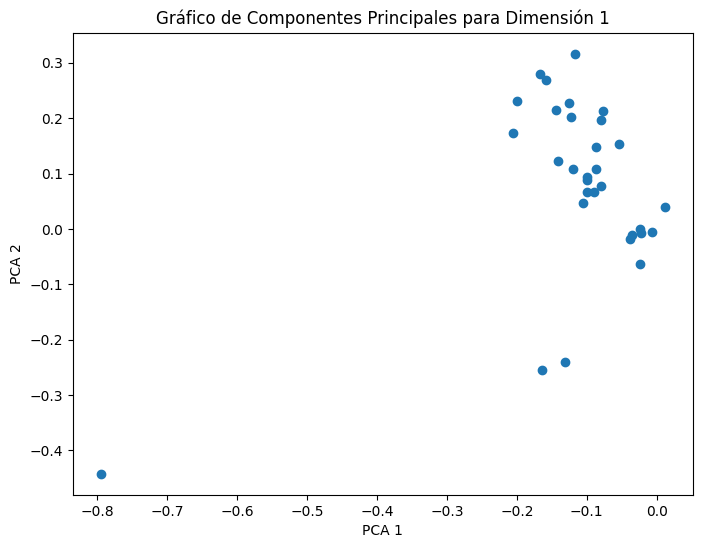


Resumen detallado para Dimensión 1:

Media:
D.46                                    0.95
P02                                     0.86
D.52                                    0.12
V1                                      0.64
D.55/V2                                 0.78
D.66.1                                  0.08
D.66.2                                  0.46
D.66.3                                  0.63
D.66.4                                  0.76
D.66.5                                  0.63
D.66.6                                  0.53
M32_20                                  0.51
D.68.1                                  0.36
D.68.2                                  0.22
D.68.3                                  0.05
D.68.4                                  0.10
D.68.5                                  0.15
D.68.6                                 -0.34
V3                                      0.32
D.67.1                                  0.55
D.67.2                                  0.50
D.67.3    

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


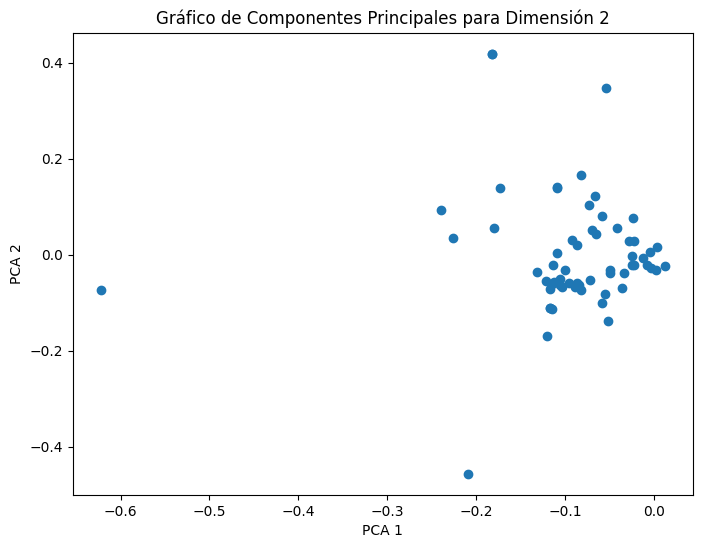


Resumen detallado para Dimensión 2:

Media:
D.31                                    0.66
M32_11                                  0.57
V1                                      0.61
D.28                                    0.93
D.77                                    0.68
                                        ... 
M32_10                                  0.78
M32_13                                  0.76
M32_14                                  0.76
V8                                      0.79
Grado de fortalecimiento dimensión 2    5.13
Length: 61, dtype: float64

Desviación estándar:
D.31                                    0.71
M32_11                                  0.29
V1                                      0.40
D.28                                    0.37
D.77                                    0.73
                                        ... 
M32_10                                  0.45
M32_13                                  0.49
M32_14                                  0.39
V8    

In [4]:
# Leer el archivo Excel
file_name = 'MCOM2_U2_EA_URSP.xlsx'  # Reemplaza con el nombre de tu archivo
df_dimension1 = pd.read_excel(file_name, sheet_name='Dimensión 1')
df_dimension2 = pd.read_excel(file_name, sheet_name='Dimensión 2')

# Función para realizar el análisis PCA y mostrar resultados detallados
def perform_pca_analysis(df, dimension_name):
    pca = PCA(n_components=7)
    numeric_data = df.select_dtypes(include=[np.number]).dropna(axis=1)  # Seleccionar solo columnas numéricas
    pca.fit(numeric_data)

    mean = numeric_data.mean()
    std_dev = numeric_data.std()
    skewness = skew(numeric_data)
    kurt = kurtosis(numeric_data)

    correlation_matrix = numeric_data.corr()
    inverse_correlation_matrix = np.linalg.inv(correlation_matrix)
    partial_correlation_matrix = pd.DataFrame(np.linalg.pinv(correlation_matrix))

    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    loadings_matrix = pca.transform(np.eye(len(numeric_data.columns)))

    # Generar el gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(pca.components_[0], pca.components_[1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'Gráfico de Componentes Principales para {dimension_name}')
    plt.show()

    print(f"\nResumen detallado para {dimension_name}:")
    print("\nMedia:")
    print(mean.round(2))
    print("\nDesviación estándar:")
    print(std_dev.round(2))
    print("\nAsimetría:")
    print(skewness.round(2))
    print("\nCurtosis:")
    print(kurt.round(2))
    print("\nMatriz de Correlación:")
    print(correlation_matrix.round(2))
    print("\nInverso de la Matriz de Correlación:")
    print(inverse_correlation_matrix.round(2))
    print("\nMatriz de Correlación Parcial:")
    print(partial_correlation_matrix.round(2))
    print("\nEigenvalores:")
    print(eigenvalues.round(2))
    print("\nEigenvectores:")
    print(eigenvectors.round(2))
    print("\nMatriz de Carga Completa:")
    print(loadings_matrix.round(2))

    return pca

# Realizar análisis para Dimensión 1
pca_dimension1 = perform_pca_analysis(df_dimension1, 'Dimensión 1')

# Realizar análisis para Dimensión 2
pca_dimension2 = perform_pca_analysis(df_dimension2, 'Dimensión 2')